# AdaBoost

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor

## Read dataset

In [2]:
data_train = pd.read_csv('processed_training.csv')
data_test = pd.read_csv('processed_test.csv')
data_train.head()

,attendance,is_federal_holiday,venue,on_grass,temperature,wind_speed,team1_name,team1_pre_win,team1_pre_loss,team1_pre_win_pct,...,weather_Rain,weather_Sunny,season_type,season,home_team_avg_att_last_year,start_hour,start_hour_label_afternoon,start_hour_label_evening,start_hour_label_night,start_hour_label_noon
0,35055,0,Wrigley Field,1,-2.786672,-0.093090,STL,-1.62645,-1.654514,0.0,...,0,1,regular,2015,0.345307,19,0,1,0,0
1,49043,0,Chase Field,1,0.705205,-0.093090,SFG,-1.62645,-1.654514,0.0,...,0,1,regular,2015,-0.573314,19,0,1,0,0
2,43633,0,Great American Ball Park,1,-0.521670,1.490839,PIT,-1.62645,-1.654514,0.0,...,0,0,regular,2015,0.066649,16,1,0,0,0
3,45030,0,Comerica Park,1,-2.031671,-0.489072,MIN,-1.62645,-1.654514,0.0,...,0,0,regular,2015,0.766348,13,0,0,0,1
4,43753,0,Minute Maid Park,1,0.516455,1.292848,CLE,-1.62645,-1.654514,0.0,...,0,0,regular,2015,-1.084575,18,0,1,0,0


In [4]:
data_train.drop(['venue', 'start_hour'], axis=1, inplace=True)
data_test.drop(['venue', 'start_hour'], axis=1, inplace=True)

In [5]:
data_train = pd.get_dummies(data_train, columns=['team1_name'])
data_test = pd.get_dummies(data_test, columns=['team1_name'])

In [6]:
data_train = pd.get_dummies(data_train, columns=['team2_name'])
data_test = pd.get_dummies(data_test, columns=['team2_name'])

In [7]:
data_train = pd.get_dummies(data_train, columns=['season_type'])
data_test = pd.get_dummies(data_test, columns=['season_type'])

In [3]:
train_cols = data_train.columns.tolist()
data_test = data_test[train_cols].copy()

In [8]:
print(set(data_train.columns) - set(data_test.columns))
print(set(data_test.columns) - set(data_train.columns))

set()

In [9]:
from sklearn.utils import shuffle
data_train = shuffle(data_train)

In [10]:
y_train = data_train['attendance'].to_numpy()
y_test = data_test['attendance'].to_numpy()

data_train.drop(['attendance'], axis=1, inplace=True)
data_test.drop(['attendance'], axis=1, inplace=True)

x_train = data_train.to_numpy()
x_test = data_test.to_numpy()

print(x_train.shape)

(12270, 273)


## kfold

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
scoring = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']
parameters = {'n_estimators': [50, 100, 500, 1000], 'learning_rate': [0.5, 0.1, 0.01, 0.001], 'loss': ['linear', 'square', 'exponential']}
model = AdaBoostRegressor(random_state=42)
clf = GridSearchCV(model, parameters, cv=5, n_jobs=-1, scoring=scoring, refit='neg_root_mean_squared_error')
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.1, 0.01, 0.001],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 500, 1000]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_mean_squared_error', 'neg_root_mean_squared_error',
                      'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [13]:
print("Best estimators:", clf.best_estimator_)
print("Best parameters:", clf.best_params_)

Best estimators: AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=100,
                  random_state=42)
Best parameters: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}


In [16]:
df_res = pd.DataFrame(data=clf.cv_results_)
df_res.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
0,22.508837,0.616215,0.451210,0.011833,0.5,linear,50,"{'learning_rate': 0.5, 'loss': 'linear', 'n_es...",-4.758108e+07,-4.796242e+07,...,16.268686,30,-0.259911,-0.261567,-0.253064,-0.259719,-0.257057,-0.258264,0.002975,30
1,45.257090,2.541378,0.887406,0.076824,0.5,linear,100,"{'learning_rate': 0.5, 'loss': 'linear', 'n_es...",-5.008462e+07,-5.125343e+07,...,74.276887,35,-0.269883,-0.272294,-0.265547,-0.269305,-0.263869,-0.268180,0.003053,35
2,48.311164,7.116659,0.909127,0.074438,0.5,linear,500,"{'learning_rate': 0.5, 'loss': 'linear', 'n_es...",-5.008462e+07,-5.212701e+07,...,98.771203,37,-0.269883,-0.275193,-0.265547,-0.271251,-0.263869,-0.269149,0.004058,37
3,48.659079,6.493892,0.878798,0.109103,0.5,linear,1000,"{'learning_rate': 0.5, 'loss': 'linear', 'n_es...",-5.008462e+07,-5.212701e+07,...,98.771203,37,-0.269883,-0.275193,-0.265547,-0.271251,-0.263869,-0.269149,0.004058,37
4,23.376624,0.401879,0.446806,0.015604,0.5,square,50,"{'learning_rate': 0.5, 'loss': 'square', 'n_es...",-4.970404e+07,-5.108639e+07,...,39.110355,36,-0.270903,-0.273686,-0.264634,-0.271637,-0.274150,-0.271002,0.003408,40


## Train with best params

In [17]:
ada = AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=100, random_state=42)
ada = ada.fit(x_train, y_train)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
train_predict = ada.predict(x_train)
print("Train MSE:", mean_squared_error(y_train, train_predict))
print("Train RMSE:", mean_squared_error(y_train, train_predict, squared=False))
print("Train MAE:", mean_absolute_error(y_train, train_predict))
print("Train MAPE:", mean_absolute_percentage_error(y_train, train_predict))

Train MSE: 44569367.18794399
Train RMSE: 6676.029298014201
Train MAE: 5302.578710526037
Train MAPE: 0.23958861233492285


Text(0.5, 0, 'AdaBoost Feature Importance')

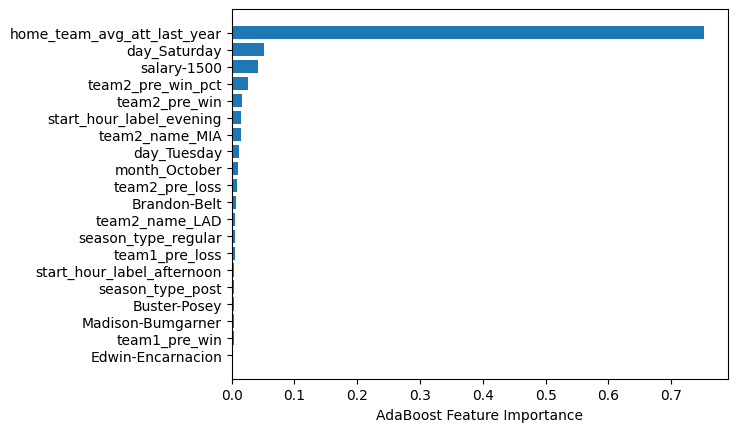

In [19]:
from matplotlib import pyplot as plt
num_features = 20
sorted_idx = ada.feature_importances_.argsort()[::-1][:num_features]
cols = data_train.columns
plt.barh(cols[sorted_idx][:num_features][::-1], ada.feature_importances_[sorted_idx][:num_features][::-1])
plt.xlabel("AdaBoost Feature Importance")

In [20]:
ada.feature_importances_[sorted_idx][:10]

array([0.7524812 , 0.05165005, 0.0418458 , 0.02599209, 0.01559484,
       0.01527443, 0.01428601, 0.01133146, 0.00929535, 0.00868515])

## Testing set

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
y_pred = ada.predict(x_test)
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test MAPE:", mean_absolute_percentage_error(y_test, y_pred))

Test MSE: 63548435.34939566
Test RMSE: 7971.727250062916
Test MAE: 6516.442072648415
Test MAPE: 0.37972597611090336


## Save model

In [22]:
import pickle
from datetime import datetime
time = datetime.today().strftime('%Y%m%d_%H%M%S')
filename = f'./model/adaboost_model_{time}.sav'
pickle.dump(ada, open(filename, 'wb'))
cv_filename = f'./model/adaboost_model_{time}_cv.csv'
df_res.to_csv(cv_filename, index=False)
# loaded_model = pickle.load(open(filename, 'rb'))